# ND Rejection Sampling

## 2D

In [158]:
import sys
sys.path.append("../../")
from pyACC.sampler import Rejection_Sampling

import numpy as np
import matplotlib.pyplot as plt

Distributions:
- bivariate Gaussian distribution
- multivariate Gaussian distribution with mean vector *mu* and covariance matrix *cov*

In [159]:
#target distribution (2D)
def target_distribution_2D(x):
    #x=[x1, x2]
    x1, x2 = x[0], x[1]
    return np.exp(-x1**2/2) * np.exp(-x2**2/2) / (2*np.pi)

#proposal distribution (2D)
def proposal_distribution_2D(x, mu=[0, 0], cov=[[1, 0], [0, 1]]):
    det = np.linalg.det(cov)
    norm_factor = 1 / (2 * np.pi * np.sqrt(det))
    x_minus_mu = np.array(x) - np.array(mu)[:, None, None]  #so that mu has the shape of x
    x_minus_mu_transposed = np.transpose(x_minus_mu, axes=(1, 2, 0))  #transpose to shape (100, 100, 2)
    exponent = -0.5 * np.einsum('ijk,kl,ijl->ij', x_minus_mu_transposed, np.linalg.inv(cov), x_minus_mu_transposed)
    return norm_factor * np.exp(exponent)

Plot

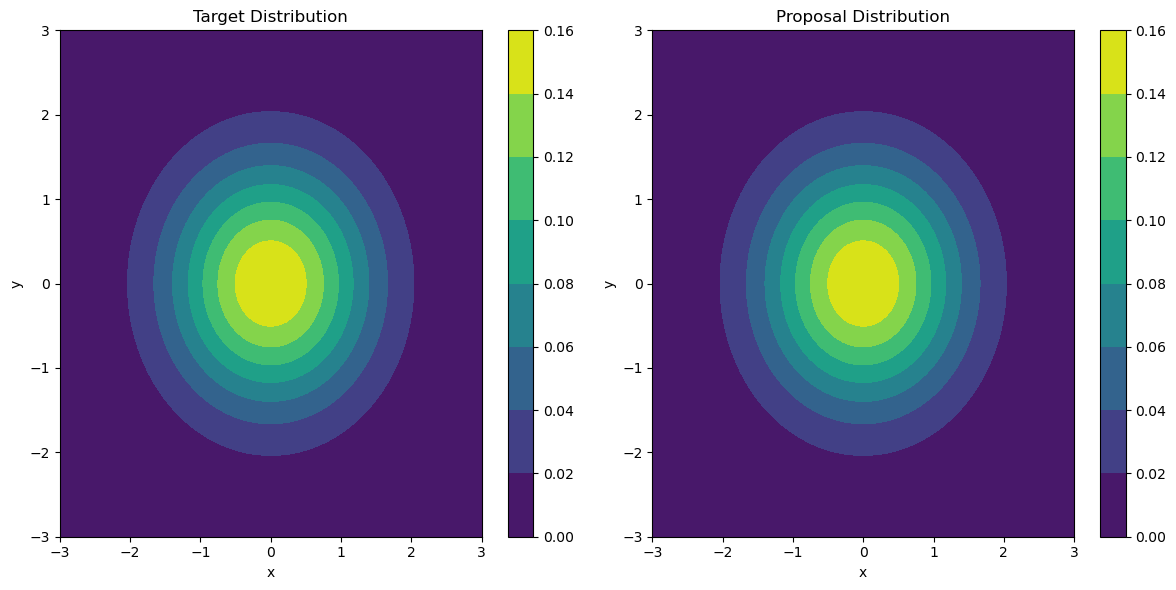

In [160]:
#x and y values
x_values_2D = np.linspace(-3, 3, 100)
y_values_2D = np.linspace(-3, 3, 100)
X_2D, Y_2D = np.meshgrid(x_values_2D, y_values_2D)
Z_target_2D = target_distribution_2D([X_2D, Y_2D])
Z_proposal_2D = proposal_distribution_2D([X_2D, Y_2D])

#plot of the target and proposal distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.contourf(X_2D, Y_2D, Z_target_2D, cmap='viridis')
plt.title('Target Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.contourf(X_2D, Y_2D, Z_proposal_2D, cmap='viridis')
plt.title('Proposal Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

plt.tight_layout()
plt.show()

Rejection sampling

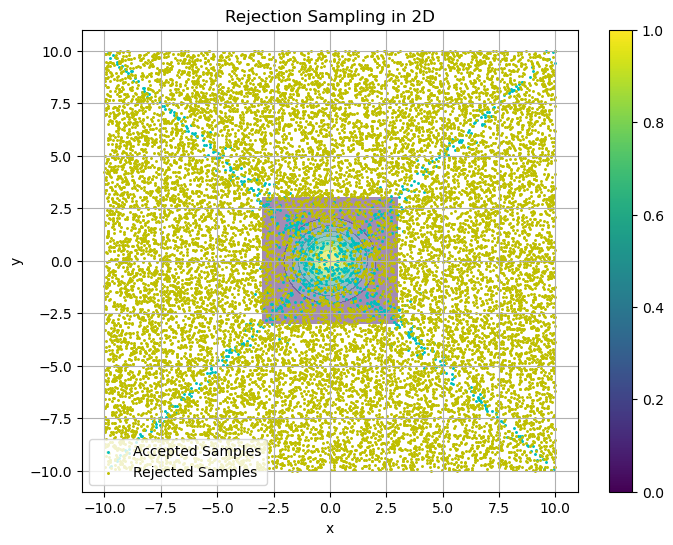

In [161]:
n_samples_2D = 1000
X_acc_2D = []
Y_acc_2D = []
X_rej_2D = []
Y_rej_2D = []
samples_2D,efficiency_2D = Rejection_Sampling(n_samples_2D, target_distribution_2D, proposal_distribution_2D, 2, X_acc_2D, Y_acc_2D, X_rej_2D, Y_rej_2D)

#plot of the generated samples along with the target distribution
plt.figure(figsize=(8, 6))
plt.contourf(X_2D, Y_2D, Z_target_2D, cmap='viridis', alpha=0.5)
plt.scatter([sample[0] for sample in X_acc_2D], [sample[1] for sample in X_acc_2D], color='c', marker='.', s=5, label='Accepted Samples')
plt.scatter([sample[0] for sample in X_rej_2D], [sample[1] for sample in X_rej_2D], color='y', marker='.', s=5, label='Rejected Samples')
plt.title('Rejection Sampling in 2D')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.colorbar()
plt.grid(True)
plt.show()

In [162]:
print("The efficiency is:", efficiency_2D)

The efficiency is: 0.05562972852692479


## ND
- target pdf: *multivariate Gaussian distribution*
- proposal pdf: *uniform distribution* over a hypercube with side length 2M

In [163]:
from scipy.stats import multivariate_t

def target_distribution_ND(x):
    mean = np.zeros_like(x)
    cov = np.eye(len(x))
    exponent = -0.5 * np.dot(x, np.dot(np.linalg.inv(cov), x))
    return np.exp(exponent) / ((2 * np.pi) ** (len(x) / 2) * np.linalg.det(cov) ** 0.5)

#'''
def proposal_distribution_ND(x):
    M = 10
    if np.all(np.abs(x) <= M):
        return (1.0 / (2 * M)) ** len(x)
    else:
        return 0.0
#'''
'''
dim=3
# Define optimized proposal distribution parameters
proposal_mean = np.zeros(dim)  # Mean close to zero
proposal_covariance = np.eye(dim)  # Identity covariance matrix or adjust based on the target distribution

# Define optimized bounds for proposal distribution
# Estimate the range of each dimension in the target distribution
target_range = np.sqrt(np.diag(np.eye(dim))) * 5  # Adjust the factor (e.g., 5) based on distribution characteristics
proposal_bounds = [(-range_val, range_val) for range_val in target_range]

# Update proposal_distribution function to use the optimized parameters
def proposal_distribution(x):
    if all(proposal_bounds[i][0] <= x[i] <= proposal_bounds[i][1] for i in range(dim)):
        # Use multivariate Gaussian distribution as proposal distribution
        return np.exp(-0.5 * (x - proposal_mean).T @ np.linalg.inv(proposal_covariance) @ (x - proposal_mean)) / ((2 * np.pi) ** (dim / 2) * np.linalg.det(proposal_covariance) ** 0.5)
    else:
        return 0.0
'''
'''
# Define proposal distribution parameters
proposal_df = 1000  # Degrees of freedom for Student's t-distribution

# Proposal distribution function
def proposal_distribution_ND(x):
    return multivariate_t.pdf(x, df=proposal_df)
'''
'''
from scipy.stats import multivariate_normal

# Define proposal distribution parameters
proposal_df = 100  # Degrees of freedom for Student's t-distribution

# Proposal distribution function
def proposal_distribution_ND(x):
    return multivariate_t.pdf(x, df=proposal_df)
dim=3
# Define proposal distribution parameters for multivariate Gaussian distribution
proposal_mean = np.zeros(dim)  # Mean of the Gaussian distribution
proposal_covariance = np.eye(dim)  # Identity covariance matrix or adjust based on the target distribution

# Proposal distribution function for multivariate Gaussian distribution
def proposal_distribution_ND(x):
    return multivariate_normal.pdf(x, mean=proposal_mean, cov=proposal_covariance)

# Define proposal distribution bounds
target_range = np.sqrt(np.diag(np.eye(dim))) * 5  # Adjust the factor (e.g., 5) based on distribution characteristics
proposal_bounds = [(-range_val, range_val) for range_val in target_range]

# Update proposal distribution function to use the optimized parameters
def proposal_distribution_ND(x):
    if all(proposal_bounds[i][0] <= x[i] <= proposal_bounds[i][1] for i in range(dim)):
        # Use multivariate Gaussian distribution as proposal distribution
        return multivariate_normal.pdf(x, mean=proposal_mean, cov=proposal_covariance)
    else:
        return 0.0
'''

"\nfrom scipy.stats import multivariate_normal\n\n# Define proposal distribution parameters\nproposal_df = 100  # Degrees of freedom for Student's t-distribution\n\n# Proposal distribution function\ndef proposal_distribution_ND(x):\n    return multivariate_t.pdf(x, df=proposal_df)\ndim=3\n# Define proposal distribution parameters for multivariate Gaussian distribution\nproposal_mean = np.zeros(dim)  # Mean of the Gaussian distribution\nproposal_covariance = np.eye(dim)  # Identity covariance matrix or adjust based on the target distribution\n\n# Proposal distribution function for multivariate Gaussian distribution\ndef proposal_distribution_ND(x):\n    return multivariate_normal.pdf(x, mean=proposal_mean, cov=proposal_covariance)\n\n# Define proposal distribution bounds\ntarget_range = np.sqrt(np.diag(np.eye(dim))) * 5  # Adjust the factor (e.g., 5) based on distribution characteristics\nproposal_bounds = [(-range_val, range_val) for range_val in target_range]\n\n# Update proposal dist

Rejection sampling

In [164]:
n_samples_ND=10000
dim=3
X_acc_ND,Y_acc_ND,X_rej_ND,Y_rej_ND=[],[],[],[]

samples_ND,efficiency_ND = Rejection_Sampling(n_samples_ND, target_distribution_ND, proposal_distribution_ND, dim, X_acc_ND, Y_acc_ND, X_rej_ND, Y_rej_ND)

Plot

*Each scatter plot shows the relationship between two dimensions of the samples, the titles of the plots indicate which columns correspond to the X and Y axes.*

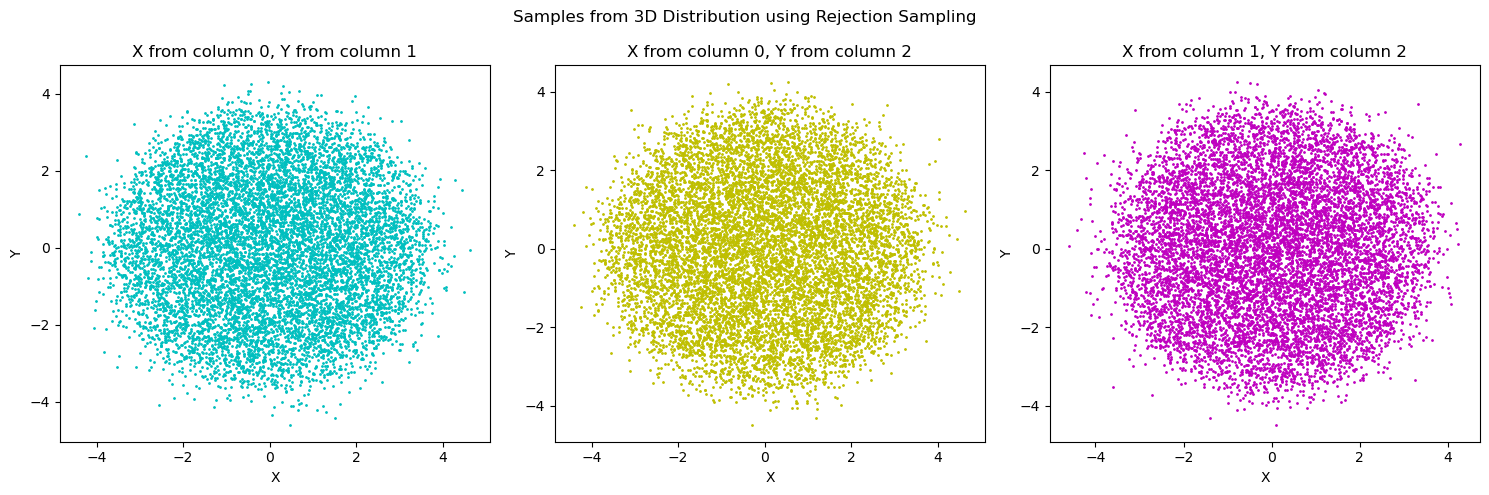

In [165]:
samples_ND=np.array(samples_ND)
dim=3
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(samples_ND[:, 0], samples_ND[:, 1], s=1, color='c')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].set_title('X from column 0, Y from column 1')

axes[1].scatter(samples_ND[:, 0], samples_ND[:, 2], s=1, color='y')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].set_title('X from column 0, Y from column 2')

axes[2].scatter(samples_ND[:, 1], samples_ND[:, 2], s=1, color='m')
axes[2].set_xlabel('X')
axes[2].set_ylabel('Y')
axes[2].set_title('X from column 1, Y from column 2')

fig.suptitle('Samples from {}D Distribution using Rejection Sampling'.format(dim))

plt.tight_layout()
plt.show()

**Extension of the analysis**, using more advanced visualization techniques and quantitative analysis methods like a *3D scatter plot* and a more quantitative analysis computing the *efficiency*.

### 3D Scatter Plot

Instead of plotting pairs of dimensions separately, I will now visualize the samples in a 3D space using a 3D scatter plot. Here's what I expect to see:

* **Distribution Centrality**: Since the mean of the distribution is at zero for all dimensions, the center of the scatter plot should be located around the origin (0, 0, 0) in the 3D space.

* **Ellipsoidal Shape**: The scatter plot should have an ellipsoidal shape, because the covariance matrix is the identity matrix. This implies that the spread of the points along each axis will be equal, and there will be no correlation between dimensions.

* **Uniform Density**: Since the PDF is proportional to the exponential of the negative squared distance from the mean, the density of points should decrease as the distance from the origin increases. However, since the covariance matrix is the identity matrix, the decrease in density should be uniform in all directions.

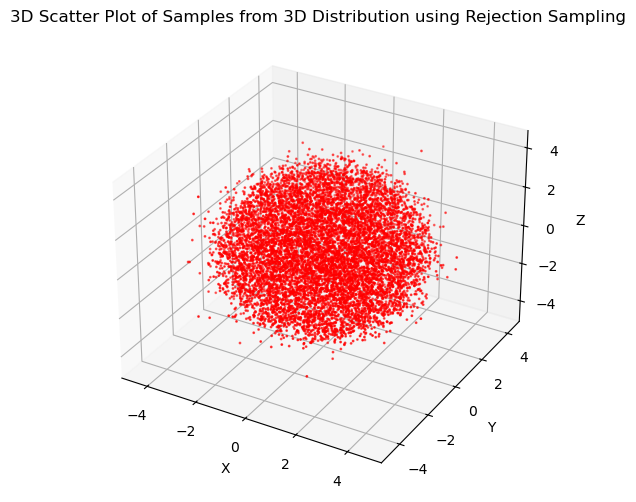

In [166]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(samples_ND[:, 0], samples_ND[:, 1], samples_ND[:, 2], s=1, color='r')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('3D Scatter Plot of Samples from {}D Distribution using Rejection Sampling'.format(dim))

plt.show()

### Efficiency

In [168]:
print("The efficiency is:", efficiency_ND)

The efficiency is: 0.02924540993291103


**Comments on the efficiency values obtained:**
* *Uniform distribution* ($\varepsilon=0.029$): it is likely that a significant portion of proposed samples are being rejected, which is typical for simple proposal distributions like the uniform distribution, that might not closely match the target distribution.
* *Multivariate Gaussian* or *Student's t-distribution* ($\varepsilon=1.0$): this result suggests that almost all proposed samples are being accepted, however achieving an efficiency of 1.0 is rare and may indicate overfitting of the proposal distribution to the target distribution.